# Exercise 1
### a. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?
Data becomes easier to work with, and
### b.Describe the Johnson–Lindenstrauss lemma.
Distance conservation when going from higher to lower dimensions with a very low amount of lost information.
### c. What is the curse of dimensionality?
The curse of dimensionality is that your set of data will increase exponentially the higher you go in the dimensions. E.g. in the first dimension, a line which is 10 units long, will become a 10 x 10 square in the second dimension and in the third dimension a 10 x 10 x 10 cube, and so on. This means that the amount of data is increase by a factor 10 each time. the 2D space would have 100 data points and 3D 1000.


# Exercise 2
## a

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import altair as alt

In [12]:
D = {(1, 5),(0, 6),(-7, 0),(-6, -1)}
ser = pd.DataFrame(D, columns=['x', 'y'])
ser

,x,y
0,-7,0
1,-6,-1
2,1,5
3,0,6


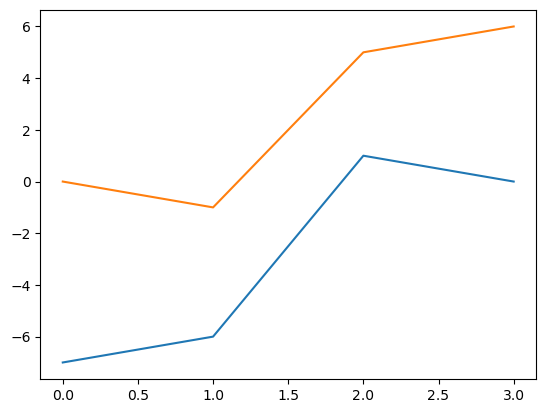

In [13]:
plt.plot(ser)
plt.show()

In [14]:
alt.Chart(ser).mark_circle().encode(
    x='x',
    y='y',
    tooltip=['x', 'y']
)

alt.Chart(...)

In [15]:
center = ser.loc[:, ['x', 'y']]
center = center - center.mean()
# Center the data so each feature has zero mean
center_chart = alt.Chart(center).mark_circle().encode(
    x='x',
    y='y',
    tooltip=['x', 'y']
)

In [16]:
D = ser.to_numpy().transpose() # ser is the Series "X" and D is now X^T transposed
# cov(X*X^T) = E(eigenvalue diagonal)E^T
S = np.cov(D)
print(f'S:\n{S}')
# S = E(=eigenvector matrix)(eigenvalue diagonal)E^T(=eigenvector matrix transposed)

S:
[[16.66666667 13.66666667]
 [13.66666667 12.33333333]]


In [17]:
S = D @ D.T / (D.shape[-1] - 1)
print(f"S:\n{S}")

S:
[[28.66666667  3.66666667]
 [ 3.66666667 20.66666667]]


In [18]:
l, v = np.linalg.eigh(S) # l = eigenvalues, v = eigenvectors, eigh is the formula for Hermidian matrix! (Symmetric matrix!)
print(f"l:\n{l},\nv:\n{v}")
# Note that we use np.linalg.eigh() because S is a symmetric matix, np.linalg.eigh() gives better performance than np.linalg.eig()

l:
[19.24039313 30.0929402 ],
v:
[[ 0.36252301 -0.93197482]
 [-0.93197482 -0.36252301]]


In [19]:
# We sort the eigenvectors by their eigenvalues the higher the eigenvalue, the higher importance it associates
idx = np.argsort(l)[::-1]
l = l[idx]
v = v[:,idx]
print(f"v:\n{v}")

v:
[[-0.93197482  0.36252301]
 [-0.36252301 -0.93197482]]


In [20]:
eigenvector = pd.DataFrame(np.vstack([v[:, 0]*20, v[:, 0]*-20]), columns=["x", "y"])

eigenvector_chart = alt.Chart(eigenvector).mark_line(color="grey", opacity=0.8).encode(
    x="x",
    y="y",
    tooltip=["x", "y"],
)

eigenvector_chart + center_chart

alt.LayerChart(...)

In [21]:
center["projection"] = (v.T[:1] @ D).reshape(-1)
center.head(5)

,x,y,projection
0,-4.0,-2.5,6.523824
1,-3.0,-3.5,5.954372
2,4.0,2.5,-2.744590
3,3.0,3.5,-2.175138


In [22]:
u, s, vh = np.linalg.svd(D)
# There is even no need to sort
# 2D -> 1D
center["projection_svd"] = (u.T[:1] @ D).reshape(-1)
center.head(5)

,x,y,projection,projection_svd
0,-4.0,-2.5,6.523824,-6.523824
1,-3.0,-3.5,5.954372,-5.954372
2,4.0,2.5,-2.744590,2.744590
3,3.0,3.5,-2.175138,2.175138


# Exercise 3
## a

In [23]:
from sklearn import random_projection

In [34]:
R = random_projection.SparseRandomProjection(density=1/3.0)
print(R)
x = np.array([[1, 2, 3], [2, 2233, 3], [1, 2, 12]])
print(x)



SparseRandomProjection(density=0.3333333333333333)
[[   1    2    3]
 [   2 2233    3]
 [   1    2   12]]


In [35]:
random_projection.johnson_lindenstrauss_min_dim(x)

array([[   0,  594,  941],
       [ 594, 6609,  941],
       [   0,  594, 2129]], dtype=int64)